# Used Car Price Prediction
[kaggle](https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./Data/REG_UsedCarSales/train-data.csv").iloc[:, 1:]
display(data.head(3))
data.shape

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


(6019, 13)

## 1. 결측치 제거

In [3]:
pd.DataFrame(data.isnull().sum()).T

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,0,0,0,0,0,0,2,36,36,42,5195,0


In [4]:
data = data[data["Mileage"].notna()]
data = data[data["Engine"].notna()]
data = data[data["Power"].notna()]
data = data[data["Power"]!="null bhp"]
data = data[data["Seats"].notna()]
data = data.reset_index(drop=True)
data.shape

(5872, 13)

## 2. Ftr Engineering

In [5]:
def cal_mileage(cols):
    num, unit = cols.split()
    if unit.endswith("km/kg"): return float(num)*1.4
    else: return float(num)

data["Company"] = data["Name"].apply(lambda x: x.split()[0])
data["Mileage"] = data["Mileage"].apply(cal_mileage)
data["Engine"] = data["Engine"].apply(lambda x: int(x.split()[0]))
data["Power"] = data["Power"].apply(lambda x: float(x.split()[0]))
#
data = data.drop(columns="New_Price")

## 3. EDA

In [6]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.386848,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.680325,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.290000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.330000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [7]:
# 이상치 제거
display(data[data["Kilometers_Driven"]>1000000])
data = data[data["Kilometers_Driven"]<1000000].reset_index(drop=True)
data = data[data["Mileage"]!=0].reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
2269,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.0,5.0,65.0,BMW


### 3-1. Company and Location

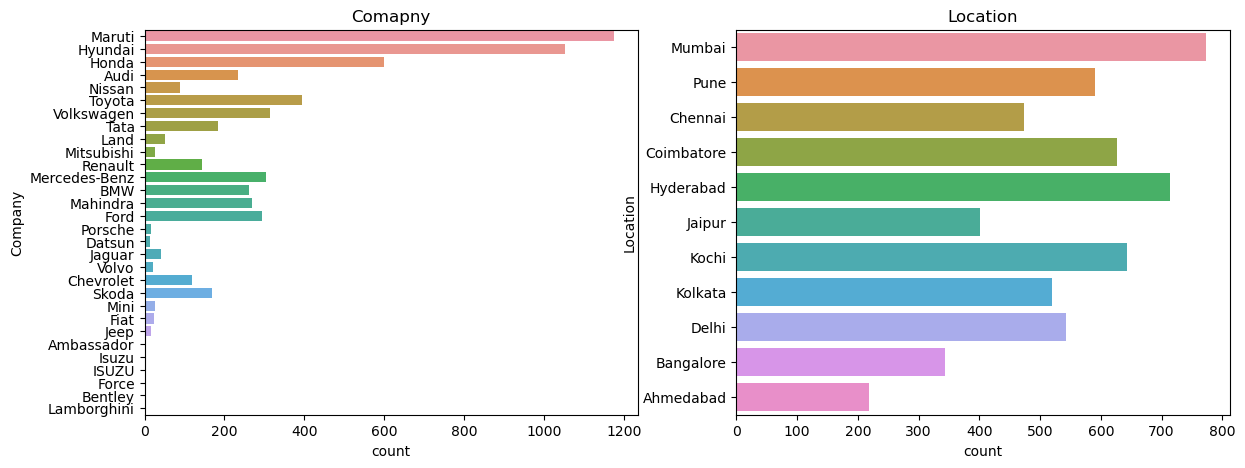

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.countplot(data=data, y="Company", ax=ax[0])
ax[0].set_title("Comapny")
sns.countplot(data=data, y="Location", ax=ax[1])
ax[1].set_title("Location")
plt.show()

### 3-2. Year - Kilmoeters_Driven

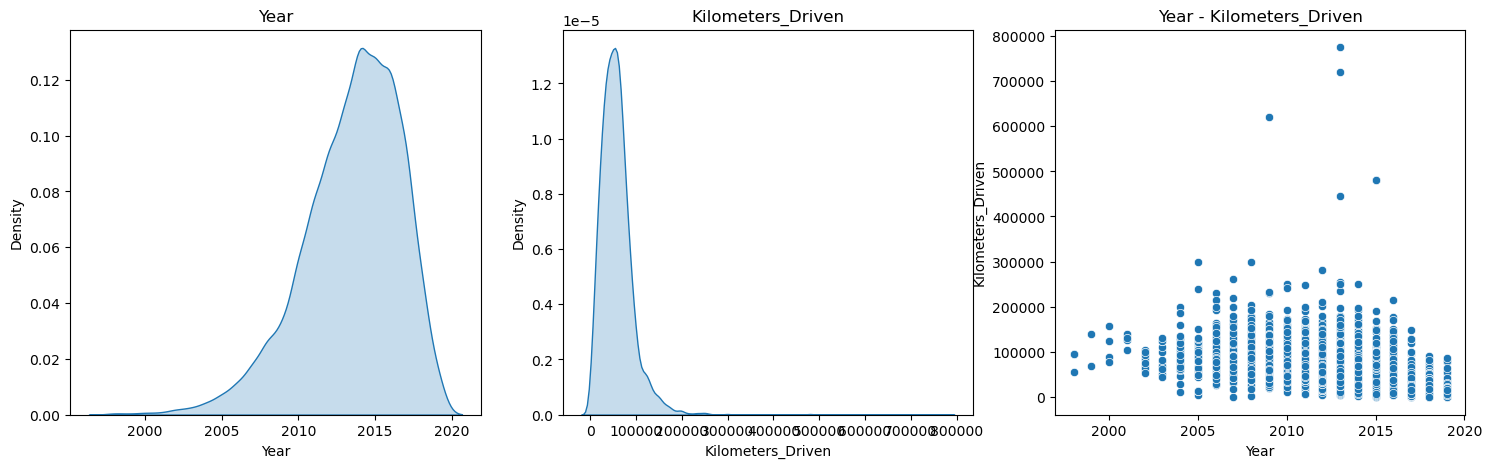

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.kdeplot(data=data, x="Year", fill=True, ax=ax[0])
ax[0].set_title("Year")
sns.kdeplot(data=data, x="Kilometers_Driven", fill=True, ax=ax[1])
ax[1].set_title("Kilometers_Driven")
sns.scatterplot(data=data, x="Year", y="Kilometers_Driven", ax=ax[2])
ax[2].set_title("Year - Kilometers_Driven")
plt.show()

### 3-3. Fuel_Type / Transmission / Owner_Type

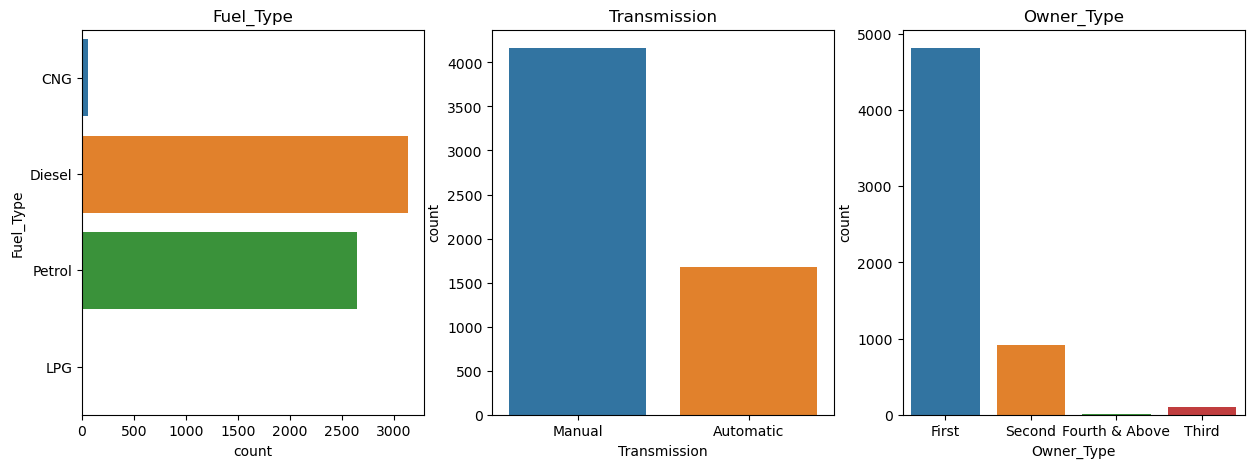

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(y=data["Fuel_Type"], ax=ax[0])
ax[0].set_title("Fuel_Type")
sns.countplot(x=data["Transmission"], ax=ax[1])
ax[1].set_title("Transmission")
sns.countplot(x=data["Owner_Type"], ax=ax[2])
ax[2].set_title("Owner_Type")
plt.show()

### 3-4. Mileage / Engine / Power / Seats

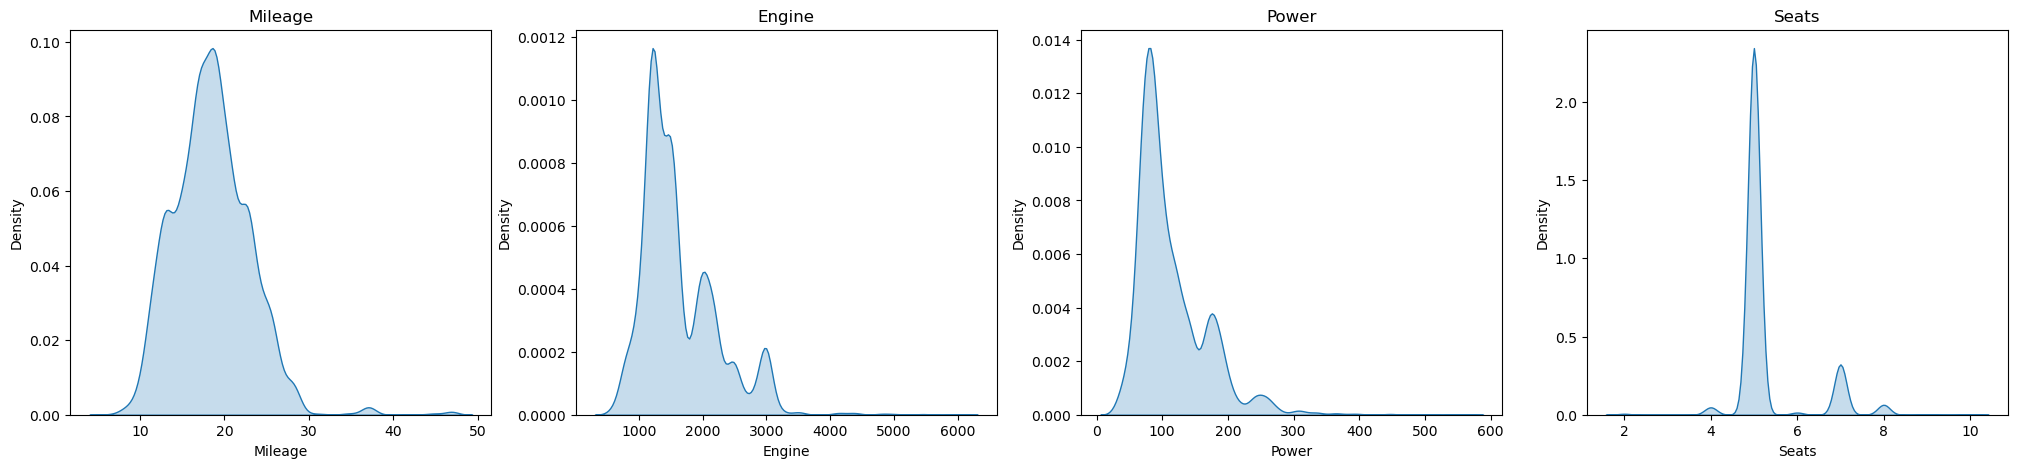

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))
sns.kdeplot(data=data, x="Mileage", fill=True, ax=ax[0])
ax[0].set_title("Mileage")
sns.kdeplot(data=data, x="Engine", fill=True, ax=ax[1])
ax[1].set_title("Engine")
sns.kdeplot(data=data, x="Power", fill=True, ax=ax[2])
ax[2].set_title("Power")
sns.kdeplot(data=data, x="Seats", fill=True, ax=ax[3])
ax[3].set_title("Seats")
plt.show()

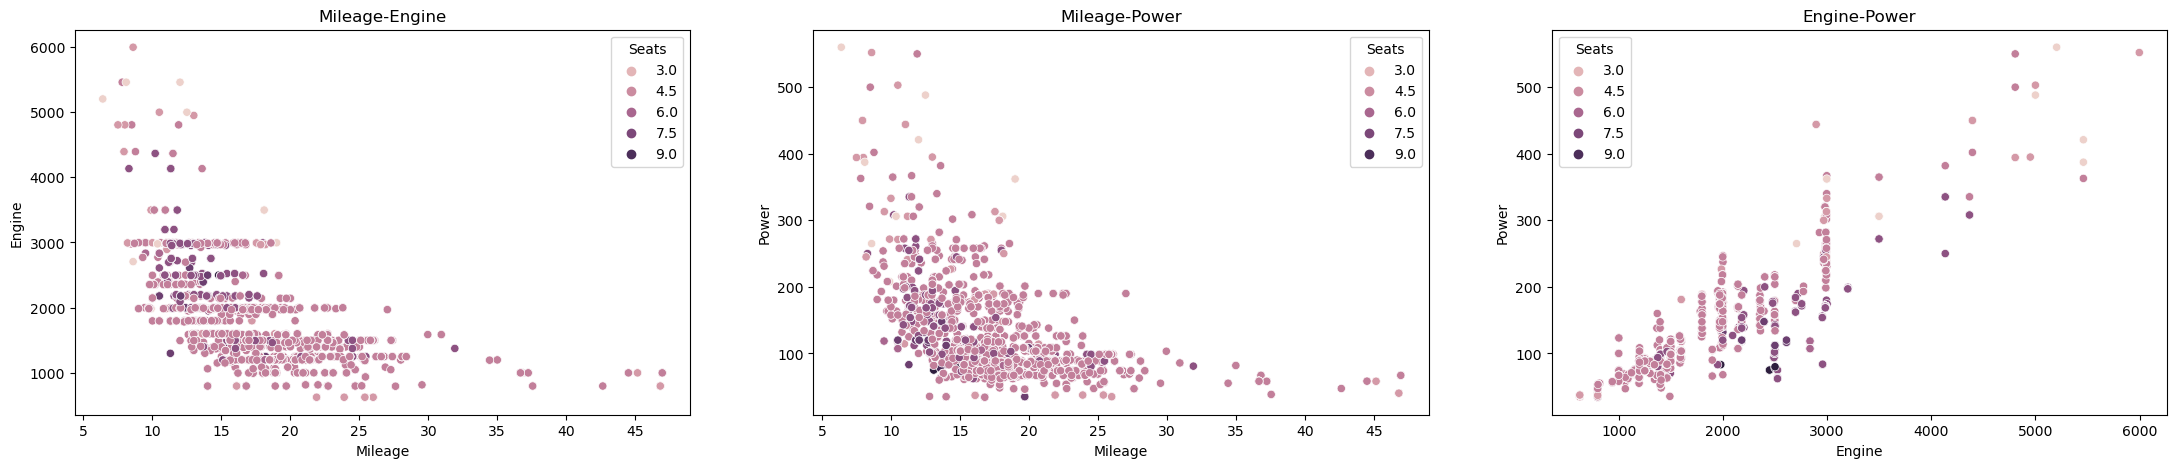

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 5))
sns.scatterplot(data=data, x="Mileage", y="Engine", hue="Seats", ax=ax[0])
ax[0].set_title("Mileage-Engine")
sns.scatterplot(data=data, x="Mileage", y="Power", hue="Seats", ax=ax[1])
ax[1].set_title("Mileage-Power")
sns.scatterplot(data=data, x="Engine", y="Power", hue="Seats")
ax[2].set_title("Engine-Power")
plt.show()

## 4. Encoding

In [13]:
data = data[["Company", "Location", "Year", "Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type", "Mileage", "Engine", "Power", "Seats", "Price"]]
data["sUseds"] = data["Owner_Type"].apply(lambda x: 1 if x=="First" else 0)
numeric = data[["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]]
encoded = pd.concat(([pd.get_dummies(data["Company"], drop_first=False, prefix="Company"), pd.get_dummies(data["Location"], drop_first=False, prefix="Location"), pd.get_dummies(data["Fuel_Type"], drop_first=False, prefix="Fuel"), pd.get_dummies(data["Transmission"], drop_first=False, prefix="Transmission")]), axis=1)
data = pd.concat([encoded, numeric, data["sUseds"], data["Price"]], axis=1)

## 5. Corr

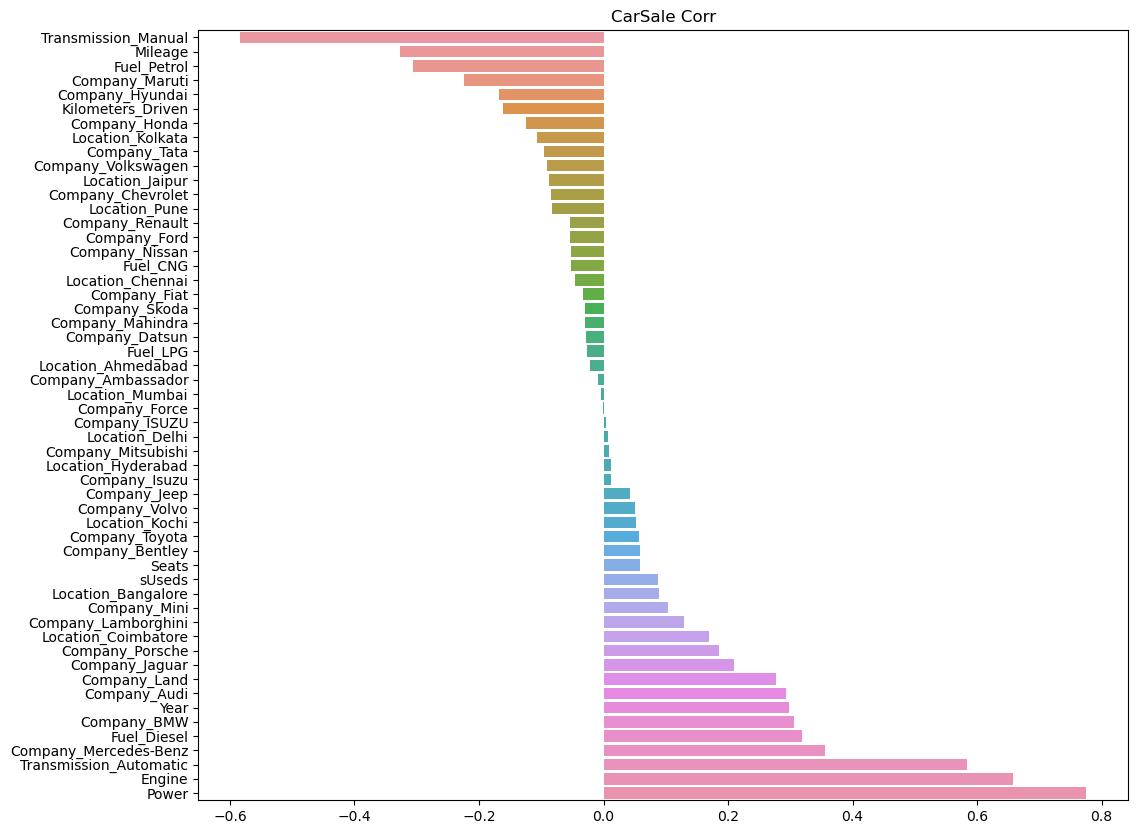

In [14]:
d_corr = data.corr()["Price"].drop("Price", axis=0)
plt.figure(figsize=(12, 10))
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.title("CarSale Corr")
plt.show()

## 6. Price

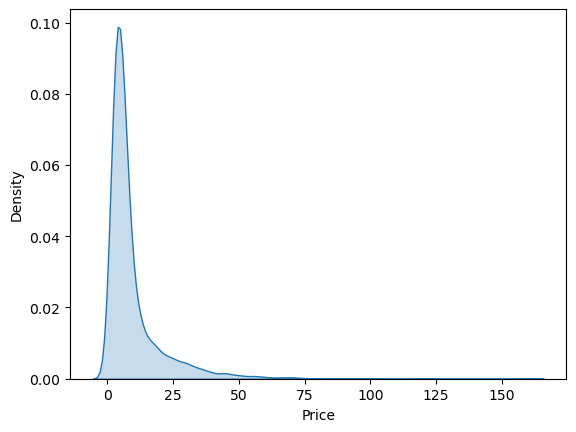

In [15]:
sns.kdeplot(data=data, x="Price", fill=True);

<Axes: xlabel='Price', ylabel='Density'>

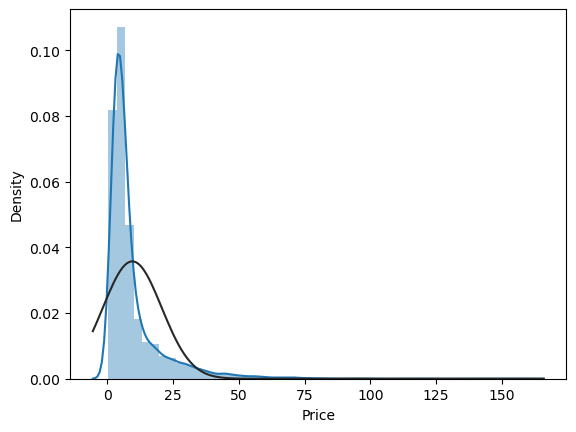

In [22]:
from scipy.stats import norm
sns.distplot(data["Price"], fit=norm)

In [16]:
data.to_csv("./Data/Prep_UsedCarSales/train.csv", index=False)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
carprice = pd.read_csv("./Data/Results/CarResult_v1.csv")
pred = pd.read_csv("./Data/Results/CarPred_v1.csv")

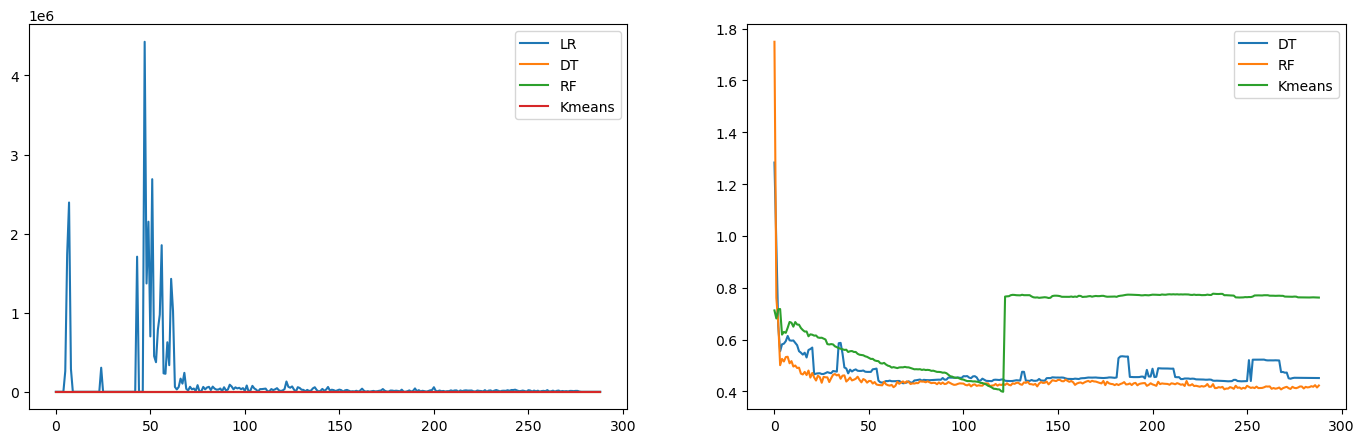

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
ax[0].plot(carprice["LR"])
ax[0].plot(carprice["DT"])
ax[0].plot(carprice["RF"])
ax[0].plot(carprice["adj_Kmeans"])
ax[0].legend(["LR", "DT", "RF", "Kmeans"])
#
ax[1].plot(carprice["DT"])
ax[1].plot(carprice["RF"])
ax[1].plot(carprice["adj_Kmeans"])
ax[1].legend(["DT", "RF", "Kmeans"])

In [20]:
carprice

,Sample#,LR,DT,RF,Kmeans,adj_Kmeans,adj_corr
0,10,1.775867,1.283244,1.749471,4.547296,0.712476,0.102
1,20,2.001381,0.965163,0.760803,1.777658,0.681358,0.237
2,30,1.725376,0.652553,0.664756,1.617074,0.717135,0.250
3,40,1.192908,0.554739,0.501103,1.269194,0.717799,0.316
4,50,1.331812,0.581522,0.525379,0.843865,0.619029,0.490
...,...,...,...,...,...,...,...
284,2850,0.545893,0.452211,0.419945,1.329769,0.762781,0.264
285,2860,0.544371,0.451848,0.417742,1.330015,0.762954,0.263
286,2870,0.543557,0.451993,0.423888,1.329964,0.762620,0.264
287,2880,0.544883,0.451644,0.414967,1.330404,0.762626,0.264
